In [1]:
from fastai.vision.all import *

# Training a classifier

In [55]:
data_dir = Path('data/shrooms')
data_dir.ls()

(#3) [Path('data/shrooms/bitterpilz'),Path('data/shrooms/braunkappe'),Path('data/shrooms/steinpilz')]

In [81]:
L(data_dir.glob('*/*.*'))

(#410) [Path('data/shrooms/bitterpilz/00000071.jpg'),Path('data/shrooms/bitterpilz/00000013.jpg'),Path('data/shrooms/bitterpilz/00000117.jpg'),Path('data/shrooms/bitterpilz/00000073.jpg'),Path('data/shrooms/bitterpilz/00000125.jpg'),Path('data/shrooms/bitterpilz/00000003.jpg'),Path('data/shrooms/bitterpilz/00000028.jpg'),Path('data/shrooms/bitterpilz/00000035.jpg'),Path('data/shrooms/bitterpilz/00000008.jpg'),Path('data/shrooms/bitterpilz/00000098.jpg')...]

In [74]:
shrooms = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128)
)

In [75]:
shrooms = shrooms.new(
    item_tfms=RandomResizedCrop(224, min_scale=.5),
    batch_tfms=aug_transforms())
dls = shrooms.dataloaders(data_dir)

In [76]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,2.181958,1.057705,0.444444,00:07


epoch,train_loss,valid_loss,error_rate,time
0,1.297347,0.835209,0.333333,00:07
1,1.077379,0.964828,0.296296,00:07
2,0.922118,0.987993,0.271605,00:07
3,0.775529,0.958149,0.283951,00:07


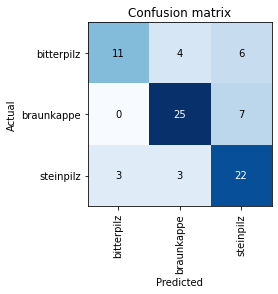

In [77]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [78]:
from fastai.vision.widgets import *

In [79]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [71]:
for idx in cleaner.delete():
    print(idx)
    cleaner.fns[idx].unlink()

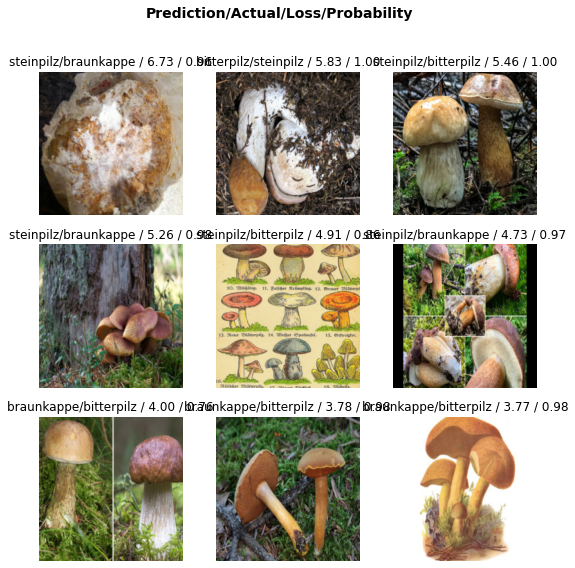

In [80]:
interp.plot_top_losses(9)

In [82]:
learn.export(fname='shrooms.pkl')

## Working with a loaded learner

In [83]:
learn_inf = load_learner('shrooms.pkl')

In [85]:
learn_inf.predict(data_dir/'bitterpilz/00000071.jpg')

('bitterpilz', tensor(0), tensor([0.9911, 0.0075, 0.0014]))

In [86]:
learn_inf.dls.vocab

(#3) ['bitterpilz','braunkappe','steinpilz']